# Part IV: Modeling

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Unpickling train/test files

In [2]:
# Unpickle finalized df_ohe
infile = open('df_ohe_final_2', 'rb')

df = pickle.load(infile)
infile.close()

In [3]:
df.shape

(957, 29)

## 2.1 Data split

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   House_type          957 non-null    object 
 1   Listing_price       957 non-null    int64  
 2   Sold_price          957 non-null    float64
 3   Bedroom             957 non-null    float64
 4   Washroom            957 non-null    int64  
 5   Parking             957 non-null    int64  
 6   Tax                 957 non-null    float64
 7   Maintenance         957 non-null    float64
 8   Size                957 non-null    float64
 9   Days_on_market      957 non-null    int64  
 10  Exposure            957 non-null    object 
 11  heat                957 non-null    int64  
 12  water               957 non-null    int64  
 13  hydro               957 non-null    int64  
 14  x0_Condo Apt        957 non-null    float64
 15  x0_Condo Townhouse  957 non-null    float64
 16  x0_Detac

In [5]:
X = df.drop(columns = ['House_type', 'Exposure', 'heat', 'hydro', 'water', 'Sold_price'])
y = df['Sold_price']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(669, 23)
(288, 23)
(669,)
(288,)


In [8]:
X_train.reset_index(inplace=True, drop = True)
X_test.reset_index(inplace=True, drop = True)
y_train.reset_index(inplace=True, drop = True)
y_test.reset_index(inplace=True, drop = True)

In [9]:
X_train.columns

Index(['Listing_price', 'Bedroom', 'Washroom', 'Parking', 'Tax', 'Maintenance',
       'Size', 'Days_on_market', 'x0_Condo Apt', 'x0_Condo Townhouse',
       'x0_Detached', 'x0_Semi-Detached', 'x1_E', 'x1_N', 'x1_NE', 'x1_NW',
       'x1_S', 'x1_SE', 'x1_SW', 'x1_W', 'x2_1_heat', 'x3_1_hydro',
       'x4_1_water'],
      dtype='object')

## 2.3 Pipeline--Modeling

1. Linear Regression
2. Lasso/Ridge
2. Random Forest
3. Logistic Regression
4. Decision Tree

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, accuracy_score

In [11]:
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

In [12]:
print(X_train_ss.shape)
print(X_test_ss.shape)
print(y_train.shape)
print(y_test.shape)

(669, 23)
(288, 23)
(669,)
(288,)


## DecisionTree Classifier

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [14]:
dt = DecisionTreeRegressor(max_depth = 4, random_state=2021)

In [15]:
dt.fit(X_train_ss, y_train)

DecisionTreeRegressor(max_depth=4, random_state=2021)

In [16]:
y_pred = dt.predict(X_test_ss)

In [17]:
dt.score(X_test_ss, y_test)

0.5982675415110063

In [18]:
dt.get_depth()

4

In [19]:
cross_val_score(dt, X_test_ss, y_test, cv=5)

array([0.43099413, 0.36125242, 0.68900266, 0.009516  , 0.61084424])

Text(0, 0.5, 'y_pred')

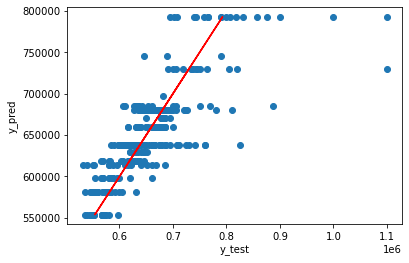

In [20]:
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred, c = 'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')

4


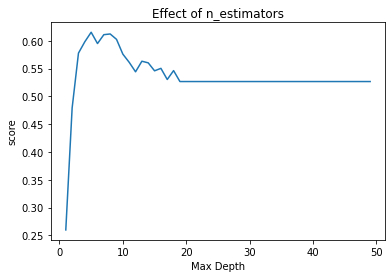

In [21]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(1, 50)
scores = []
n_estimators = []
for n in estimators:
    dt.set_params(max_depth=n)
    dt.fit(X_train_ss, y_train)
    scores.append(dt.score(X_test_ss, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("Max Depth")
plt.ylabel("score")
plt.plot(estimators, scores)

print(scores.index(max(scores)))

In [22]:
import graphviz 
import sklearn
import pydotplus

In [23]:
X_train.columns[:-1]

Index(['Listing_price', 'Bedroom', 'Washroom', 'Parking', 'Tax', 'Maintenance',
       'Size', 'Days_on_market', 'x0_Condo Apt', 'x0_Condo Townhouse',
       'x0_Detached', 'x0_Semi-Detached', 'x1_E', 'x1_N', 'x1_NE', 'x1_NW',
       'x1_S', 'x1_SE', 'x1_SW', 'x1_W', 'x2_1_heat', 'x3_1_hydro'],
      dtype='object')

In [24]:
dot_data = sklearn.tree.export_graphviz(dt, out_file = 'thisIsTheImagetree.dot',
                                 feature_names=X_train.columns, filled = True, rounded  = True, special_characters = True)


In [25]:
from graphviz import Source

s = Source.from_file('thisIsTheImagetree.dot')
s.view()

'thisIsTheImagetree.dot.pdf'

## RandomForestRegressor

In [26]:
rf = RandomForestRegressor(n_estimators = 72, random_state = 2021)
rf.fit(X_train_ss, y_train)
y_pred = rf.predict(X_test_ss)

In [27]:
print(rf.oob_score_)
print(rf.score(X_test_ss, y_test))
# print(rf.oob_prediction_)

AttributeError: 'RandomForestRegressor' object has no attribute 'oob_score_'

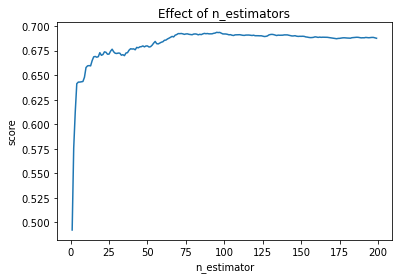

In [28]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(1, 200)
scores = []
n_estimators = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train_ss, y_train)
    scores.append(rf.score(X_test_ss, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [30]:
print(scores.index(max(scores)))

72


<AxesSubplot:>

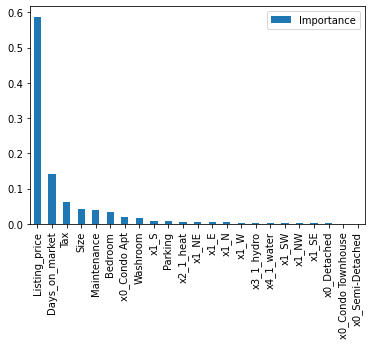

In [29]:
features = X_train.columns

importance = rf.feature_importances_
importance_df = pd.DataFrame(importance, 
                          columns=["Importance"],
                          index = features)

# print(importance_df.iloc[:, 0])

importance_df.sort_values(by='Importance', ascending=False).plot(kind='bar')

In [30]:
# Adjusted R squared #2
def adj_r2(X_test_ss, r2_score):
    nrows = X_test_ss.shape[0]
    ncols = X_test_ss.shape[1]
    adj_r2 = 1-(((1-r2_score)*(nrows-1))/(nrows-ncols-1))
    
    return adj_r2

RandomForestRegressor
----------
RMSE: $44505.70
R2 Score: 0.693
R2 Score Adj: 0.666


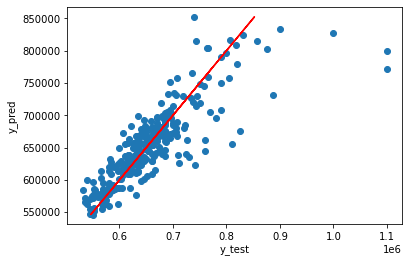

In [31]:
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred, c = 'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')


from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
adj_r2score = adj_r2(X_test_ss, r2_score)

print('RandomForestRegressor')
print('-'*10)  
print('RMSE: $%.2f'%(np.sqrt(mse)))
print('R2 Score: %.3f'%(r2_score))
print('R2 Score Adj: %.3f' %(adj_r2score))

In [32]:
RandomForestRegressor(n_estimators = 72, random_state = 2021)

RandomForestRegressor(n_estimators=72, random_state=2021)

In [33]:
RandomForestRegressor( random_state = 2021)
params_search_space = {'n_estimators' : [72],
                       'max_depth' : [1,2,3,4,5,10, 15, 20, 30, 50, 100]}

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [35]:
grid_search = GridSearchCV(rf, param_grid = params_search_space)
grid_search.fit(X, y)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=199,
                                             random_state=2021),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30, 50, 100],
                         'n_estimators': [72]})

In [36]:
cv_results = grid_search.cv_results_
results = pd.DataFrame(cv_results)
results.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.194111,0.005467,0.006572,5.088654e-04,15,72,"{'max_depth': 15, 'n_estimators': 72}",0.671467,0.670975,0.672612,0.742521,0.679863,0.687488,0.027704,1
7,0.197106,0.003051,0.006197,4.039235e-04,20,72,"{'max_depth': 20, 'n_estimators': 72}",0.671704,0.670866,0.676778,0.734693,0.678204,0.686449,0.024287,2
8,0.199423,0.003972,0.006392,4.806092e-04,30,72,"{'max_depth': 30, 'n_estimators': 72}",0.673789,0.669249,0.674580,0.731925,0.680040,0.685916,0.023258,3
9,0.195904,0.006298,0.006286,4.002709e-04,50,72,"{'max_depth': 50, 'n_estimators': 72}",0.673789,0.669249,0.674580,0.731925,0.680040,0.685916,0.023258,3
10,0.201104,0.005934,0.006537,4.486200e-04,100,72,"{'max_depth': 100, 'n_estimators': 72}",0.673789,0.669249,0.674580,0.731925,0.680040,0.685916,0.023258,3
5,0.165561,0.000836,0.005984,1.507891e-07,10,72,"{'max_depth': 10, 'n_estimators': 72}",0.671573,0.662832,0.678304,0.736378,0.680069,0.685831,0.025989,6
4,0.106470,0.000810,0.005380,8.020355e-04,5,72,"{'max_depth': 5, 'n_estimators': 72}",0.660849,0.641725,0.661794,0.732004,0.711999,0.681674,0.034286,7
3,0.098547,0.005171,0.005199,4.096219e-04,4,72,"{'max_depth': 4, 'n_estimators': 72}",0.649222,0.617375,0.636941,0.694898,0.721767,0.664041,0.038513,8
2,0.085775,0.000305,0.004979,1.387965e-05,3,72,"{'max_depth': 3, 'n_estimators': 72}",0.605131,0.557701,0.575067,0.660674,0.669523,0.613619,0.044776,9
1,0.075250,0.000433,0.004791,4.016720e-04,2,72,"{'max_depth': 2, 'n_estimators': 72}",0.526002,0.465341,0.489278,0.557458,0.524854,0.512587,0.031998,10


In [37]:
print(f"Mean cross-validated score of the best_estimator: {grid_search.best_score_}")
print(grid_search.best_params_ )

Mean cross-validated score of the best_estimator: 0.6874877552904033
{'max_depth': 15, 'n_estimators': 72}


In [38]:
rf = RandomForestRegressor(n_estimators = 72, max_depth = 15, random_state = 2021)
rf.fit(X_train_ss, y_train)
y_pred = rf.predict(X_test_ss)

RandomForestRegressor
----------
RMSE: $44508.12
R2 Score: 0.692
R2 Score Adj: 0.666


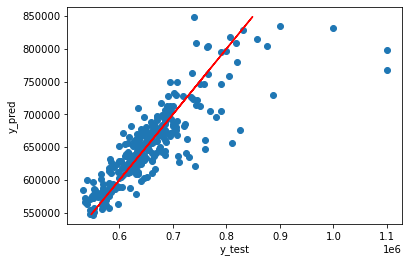

In [39]:
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred, c = 'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')


from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
adj_r2score = adj_r2(X_test_ss, r2_score)

print('RandomForestRegressor')
print('-'*10)  
print('RMSE: $%.2f'%(np.sqrt(mse)))
print('R2 Score: %.3f'%(r2_score))
print('R2 Score Adj: %.3f' %(adj_r2score))

## LogisticRegression

In [40]:
lr = LogisticRegression(C=0.2, random_state=2021)
lr.fit(X_train_ss, y_train)
y_pred = lr.predict(X_test_ss)

C:\Users\Hyeyeon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
lr.score(X_test_ss, y_test)

0.03125

Text(0, 0.5, 'y_pred')

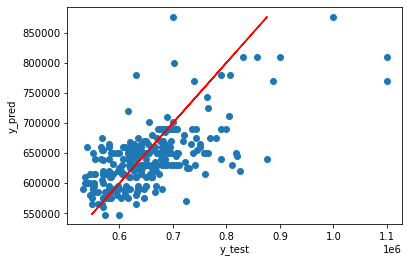

In [42]:
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred, c = 'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [43]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(0, 1, 0.05)
scores = []


for c in estimators:
    lr.set_params(C=c)
    lr.fit(X_train_ss, y_train)
    scores.append(lr.score(X_test_ss, y_test))
    
plt.title("Inverse of regularization strength")
plt.xlabel("C")
plt.ylabel("score")
plt.plot(estimators, scores)

C:\Users\Hyeyeon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:759: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
C:\Users\Hyeyeon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:299: RuntimeWarning: invalid value encountered in double_scalars
  loss += 0.5 * alpha * squared_norm(w)
C:\Users\Hyeyeon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:351: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] += alpha * w
C:\Users\Hyeyeon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

KeyboardInterrupt: 

In [ ]:
lr = LogisticRegression(C=0.4, random_state=2021)
lr.fit(X_train_ss, y_train)
y_pred = lr.predict(X_test_ss)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
adj_r2score = adj_r2(X_test_ss, r2score)

print(f'MSE:{mse.round(2)}')
print(f'RMSE:{np.sqrt(mse).round(2)}')
print(f'R2 Score: {r2score.round(3)}')
print(f'R2 Score Adj: {adj_r2score.round(3)}')
print('-'*10)

## XGBoost

In [44]:
import xgboost as xgb

In [57]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 4, n_estimators = 74)

In [58]:
xg_reg.fit(X_train_ss,y_train)

preds = xg_reg.predict(X_test_ss)

In [59]:
from sklearn.metrics import r2_score

rmse = np.sqrt(mean_squared_error(y_test, preds))
r2_score = r2_score(y_test, preds)
print("RMSE: %f" % (rmse))
print("r2_score:%f" %(r2_score))

RMSE: 42663.023779
r2_score:0.717443


### RandomizedSearchCV()

In [48]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [49]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
params_search_space = {'colsample_bytree' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                       'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.5, 1],
                       'max_depth': [1, 4, 8, 16, 32],
                       'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                       'alpha':[0.01, 0.1, 0.5, 1, 10, 50, 100, 1000]}

n_iter_search = 30

In [50]:
random_search = RandomizedSearchCV(xg_reg, param_distributions=params_search_space, n_iter=n_iter_search)

In [51]:
# start = time()
random_search.fit(X, y)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time() - start), n_iter_search))
# report(random_search.cv_results_)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
          

In [52]:
cv_results = random_search.cv_results_
results = pd.DataFrame(cv_results)
results.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.024236,0.000400,0.001995,2.431402e-07,50,4,0.1,0.6,0.01,"{'n_estimators': 50, 'max_depth': 4, 'learning...",0.637614,0.625972,0.758802,0.715642,0.723747,0.692356,0.051665,1
11,0.041888,0.001410,0.001995,2.431402e-07,90,4,0.1,0.8,1000,"{'n_estimators': 90, 'max_depth': 4, 'learning...",0.678421,0.673259,0.711900,0.700970,0.679992,0.688908,0.014890,2
13,0.066154,0.003567,0.002394,4.888505e-04,60,8,0.1,0.5,0.1,"{'n_estimators': 60, 'max_depth': 8, 'learning...",0.647992,0.657317,0.749972,0.686681,0.666395,0.681671,0.036472,3
2,0.091459,0.001396,0.001995,3.234067e-07,80,8,0.1,0.4,50,"{'n_estimators': 80, 'max_depth': 8, 'learning...",0.638212,0.659874,0.736647,0.690647,0.644914,0.674059,0.036133,4
10,0.008777,0.000399,0.001795,3.989936e-04,10,4,0.5,0.4,1,"{'n_estimators': 10, 'max_depth': 4, 'learning...",0.634082,0.647286,0.702491,0.678896,0.675186,0.667589,0.024243,5
9,0.036306,0.001740,0.002194,3.990890e-04,80,4,0.05,0.9,10,"{'n_estimators': 80, 'max_depth': 4, 'learning...",0.583030,0.576275,0.693310,0.709452,0.772321,0.666878,0.075985,6
7,0.306556,0.006285,0.002186,3.838783e-04,100,16,0.1,1,1,"{'n_estimators': 100, 'max_depth': 16, 'learni...",0.666547,0.598949,0.675908,0.698020,0.621403,0.652165,0.036473,7
28,0.086571,0.003606,0.002194,3.988744e-04,60,8,0.5,0.9,100,"{'n_estimators': 60, 'max_depth': 8, 'learning...",0.621229,0.595615,0.655473,0.568231,0.619593,0.612028,0.029041,8
18,0.008577,0.000488,0.001795,3.988028e-04,10,4,1,0.6,0.01,"{'n_estimators': 10, 'max_depth': 4, 'learning...",0.626230,0.468507,0.558850,0.580535,0.499970,0.546819,0.056418,9
6,0.083021,0.001569,0.002296,3.999818e-04,50,8,1,1,1,"{'n_estimators': 50, 'max_depth': 8, 'learning...",0.510184,0.388187,0.556359,0.630438,0.456553,0.508344,0.082868,10


In [53]:
print(random_search.best_score_)
print(random_search.best_params_ )

0.6923557491649717
{'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'alpha': 0.01}


### GridSearch

In [89]:
# Finding the best parameters
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
params_search_space = {'colsample_bytree' : [0.6, 0.7, 0.8, 0.9, 1],
                       'learning_rate' : [0.05, 0.1],
                      'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                      'n_estimators' : [65, 70, 75, 80, 85, 90],
                       'alpha':[0.1, 0.5, 1]}

In [90]:
grid_search = GridSearchCV(xg_reg, param_grid = params_search_space)
grid_search.fit(X, y)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [91]:
cv_results = grid_search.cv_results_
results = pd.DataFrame(cv_results)
results.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1125,0.034707,0.000399,0.001795,3.989935e-04,0.5,0.9,0.1,4,80,"{'alpha': 0.5, 'colsample_bytree': 0.9, 'learn...",0.684862,0.708751,0.799167,0.765152,0.730140,0.737615,0.040543,1
1785,0.037870,0.007376,0.000000,0.000000e+00,1,0.9,0.1,4,80,"{'alpha': 1, 'colsample_bytree': 0.9, 'learnin...",0.684862,0.708752,0.799167,0.765152,0.730140,0.737615,0.040543,2
465,0.035106,0.000746,0.001795,3.990650e-04,0.1,0.9,0.1,4,80,"{'alpha': 0.1, 'colsample_bytree': 0.9, 'learn...",0.684862,0.708751,0.799167,0.765152,0.730093,0.737605,0.040545,3
1787,0.037492,0.007653,0.006248,7.652728e-03,1,0.9,0.1,4,90,"{'alpha': 1, 'colsample_bytree': 0.9, 'learnin...",0.689006,0.706915,0.798526,0.761809,0.730249,0.737301,0.039127,4
1127,0.039095,0.001163,0.001797,3.996732e-04,0.5,0.9,0.1,4,90,"{'alpha': 0.5, 'colsample_bytree': 0.9, 'learn...",0.689006,0.706915,0.798526,0.761809,0.730249,0.737301,0.039127,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,0.047165,0.000603,0.000000,0.000000e+00,0.5,0.8,0.05,14,65,"{'alpha': 0.5, 'colsample_bytree': 0.8, 'learn...",0.298416,0.418985,0.635523,0.613821,0.783644,0.550078,0.171135,1976
1644,0.044576,0.005416,0.003124,6.248569e-03,1,0.8,0.05,14,65,"{'alpha': 1, 'colsample_bytree': 0.8, 'learnin...",0.298415,0.418984,0.635522,0.613821,0.783644,0.550077,0.171136,1977
306,0.043284,0.002239,0.001995,1.907349e-07,0.1,0.8,0.05,11,65,"{'alpha': 0.1, 'colsample_bytree': 0.8, 'learn...",0.300063,0.416610,0.639144,0.611715,0.781887,0.549884,0.170756,1978
966,0.034367,0.006248,0.012577,6.290586e-03,0.5,0.8,0.05,11,65,"{'alpha': 0.5, 'colsample_bytree': 0.8, 'learn...",0.300063,0.416609,0.639144,0.611714,0.781887,0.549883,0.170756,1979


In [92]:
print(f"Mean cross-validated score of the best_estimator: {grid_search.best_score_}")
print(grid_search.best_params_ )

Mean cross-validated score of the best_estimator: 0.7376146203968517
{'alpha': 0.5, 'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 80}


In [58]:
grid_search.best_estimator_

XGBRegressor(alpha=0.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=90, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Final hyperparameter

In [60]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.9, learning_rate = 0.1,
                max_depth = 4, n_estimators = 80, alpha= 0.5)

In [61]:
xg_reg.fit(X_train_ss,y_train)

preds = xg_reg.predict(X_test_ss)

In [62]:
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2_score = r2_score(y_test, preds)
print("RMSE: %f" % (rmse))
print("r2_score:%f" %(r2_score))

RMSE: 42650.174711
r2_score:0.717614


## Cross-validation

In [63]:
# n_estimator is excluded bc num_boost_rounds is being used
params = {"objective":"reg:squarederror",'colsample_bytree': 0.9,'learning_rate': 0.1,'max_depth': 4, 'alpha': 0.5}

In [64]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [65]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=2021)

In [66]:
# contains train adn test RMSE metrics for each boosting round
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,584729.520833,3188.594944,584630.354167,6952.450408
1,526979.125000,2944.747342,526962.177083,6884.511382
2,475020.760417,2731.405873,475005.937500,6747.804292
3,428275.104167,2520.178350,428256.062500,6671.594277
4,386227.656250,2367.601091,386191.979167,6639.308418
5,348399.812500,2188.119107,348475.604167,6632.227276
6,314355.812500,2034.878970,314512.187500,6521.311359
7,283744.197917,1903.694099,284047.520833,6458.729046
8,256221.890625,1777.629261,256675.208333,6581.478147
9,231460.635417,1678.386701,231906.505208,6541.690044


In [67]:
print((cv_results["test-rmse-mean"]).tail(1))

49    36710.57487
Name: test-rmse-mean, dtype: float64


In [68]:
data_dmatrix_train = xgb.DMatrix(data=X_train_ss,label=y_train)
data_dmatrix_test = xgb.DMatrix(data=X_test_ss)

In [69]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix_train, num_boost_round=10)

<AxesSubplot:>

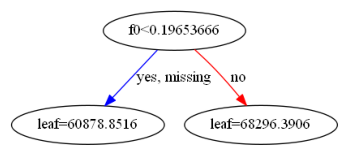

In [70]:
xgb.plot_tree(xg_reg,num_trees=0)

<AxesSubplot:>

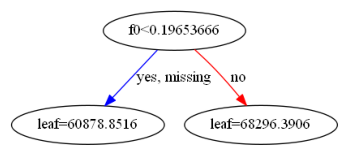

In [71]:
# Visualizing Boosting Trees
xgb.plot_tree(xg_reg,num_trees=0)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

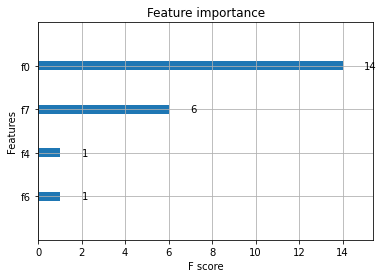

In [72]:
xgb.plot_importance(xg_reg)

# Gradient Boosting Regressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [74]:
gb = GradientBoostingRegressor(random_state=2021)
gb.fit(X_train_ss, y_train)
gb.score(X_test_ss, y_test)

0.7388157600639478

In [75]:
# Finding the best parameters
gb = AdaBoostRegressor(random_state=2021)
params_search_space = {'learning_rate' : [0.03, 0.035, 0.04, 0.05, 0.1],
                      'n_estimators' : [100, 150, 200, 250, 300, 350, 400]}

In [76]:
grid_search = GridSearchCV(gb, param_grid = params_search_space)
grid_search.fit(X, y)


KeyboardInterrupt: 

In [117]:
cv_results = grid_search.cv_results_
results = pd.DataFrame(cv_results)
results.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.310702,0.008677,0.012763,0.006402,0.04,250,"{'learning_rate': 0.04, 'n_estimators': 250}",0.626260,0.565580,0.743914,0.678216,0.613064,0.645407,0.060934,1
26,0.432721,0.007106,0.015621,0.000001,0.05,350,"{'learning_rate': 0.05, 'n_estimators': 350}",0.647275,0.572205,0.759655,0.681788,0.565702,0.645325,0.072237,2
20,0.490069,0.012993,0.028121,0.006249,0.04,400,"{'learning_rate': 0.04, 'n_estimators': 400}",0.646131,0.573593,0.757414,0.678930,0.570482,0.645310,0.069915,3
19,0.427249,0.013052,0.023440,0.006590,0.04,350,"{'learning_rate': 0.04, 'n_estimators': 350}",0.641356,0.570784,0.754977,0.676871,0.582188,0.645235,0.067197,4
13,0.492406,0.004705,0.022226,0.005518,0.035,400,"{'learning_rate': 0.035, 'n_estimators': 400}",0.640976,0.571425,0.747470,0.680234,0.582492,0.644519,0.064926,5
27,0.475710,0.004628,0.023292,0.007244,0.05,400,"{'learning_rate': 0.05, 'n_estimators': 400}",0.650261,0.573327,0.759635,0.683358,0.555970,0.644510,0.074434,6
25,0.369518,0.015615,0.016293,0.001328,0.05,300,"{'learning_rate': 0.05, 'n_estimators': 300}",0.642218,0.571437,0.753711,0.681831,0.573157,0.644471,0.068926,7
12,0.439050,0.006584,0.017418,0.004852,0.035,350,"{'learning_rate': 0.035, 'n_estimators': 350}",0.636369,0.570091,0.742483,0.681181,0.591435,0.644312,0.062233,8
18,0.375947,0.009410,0.016887,0.001336,0.04,300,"{'learning_rate': 0.04, 'n_estimators': 300}",0.632308,0.567167,0.750041,0.675850,0.595415,0.644156,0.064280,9
24,0.308000,0.007927,0.015694,0.000129,0.05,250,"{'learning_rate': 0.05, 'n_estimators': 250}",0.636053,0.568551,0.747261,0.683873,0.580914,0.643330,0.066312,10


In [77]:
print(f"Mean cross-validated score of the best_estimator: {grid_search.best_score_}")
print(grid_search.best_params_ )

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [78]:
print(f"Mean cross-validated score of the best_estimator: {grid_search.best_score_}")
print(grid_search.best_params_ )

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'